In [1]:
import matplotlib.pyplot as plt

In [ ]:
# For QQ-plots
import pylab 

In [2]:
>>> import scipy.stats
>>> import numpy as np

In [3]:
with open('Nerve_Firing_Data.txt', 'r') as f:
    lines = f.readlines()

In [4]:
f = lambda s: [float(el) for el in s.replace('\n','').split('\t')]

In [5]:
data = []

for l in lines[:-1]:
    data += f(l)

In [6]:
hist = np.histogram(data)
hist_dist = scipy.stats.rv_histogram(hist)

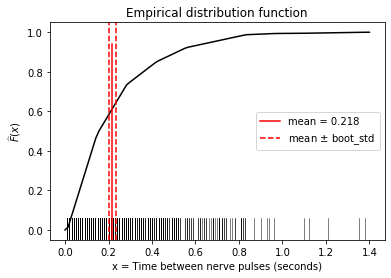

In [40]:
for d in data:
    plt.axvline(x=d, ymax = 0.1, linewidth=0.5, color='black')
 

X = np.linspace(0, 1.4, 100)
plt.plot(X, hist_dist.cdf(X), color='black')

# confidence intervals:
n = len(data)
alpha = 0.05
#upper = np.minimum(hist_dist.cdf(X)+np.sqrt(np.log(2/alpha)/(2*n)),np.ones_like(X))
#lower = np.maximum(hist_dist.cdf(X)-np.sqrt(np.log(2/alpha)/(2*n)),np.zeros_like(X))
#plt.plot(X, upper, color='red', linestyle='--', label='0.95 confidence interval')
#plt.plot(X, lower, color='red', linestyle='--')

plt.title('Empirical distribution function')
#plt.plot(X, hist_dist.pdf(X), label='CDF', color='green')
plt.xlabel('x = Time between nerve pulses (seconds)')
plt.ylabel('$\widehat{F}(x)$')

plt.axvline(x = np.mean(data), ymax = 0.9, color = 'red', label = 'mean = 0.218')
plt.axvline(x = np.mean(data)+2*np.std(boot_means),color='red',linestyle='--',label = 'mean $\pm$ boot_std')
plt.axvline(x = np.mean(data)-2*np.std(boot_means),color='red',linestyle='--')

plt.legend()

#plt.savefig('Nerve_firing_CDF_mean.png', dpi=1000)

In [14]:
boot_means = [np.mean(np.random.choice(data,len(data))) for _ in range(1000)]

Text(0.5, 1.0, '1000 bootstrap samples')

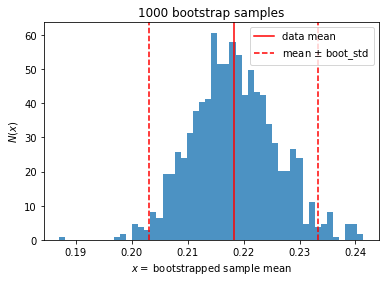

In [39]:
plt.hist(boot_means,bins=50,density=True,alpha=0.8)
plt.axvline(x = np.mean(data),color='red',label='data mean')
plt.axvline(x = np.mean(data)+2*np.std(boot_means),color='red',linestyle='--',label = 'mean $\pm$ boot_std')
plt.axvline(x = np.mean(data)-2*np.std(boot_means),color='red',linestyle='--')
plt.legend()
plt.xlabel('$x = $ bootstrapped sample mean')
plt.ylabel('$N(x)$')
plt.title('1000 bootstrap samples')

#plt.savefig('Nerve_firing_boot.png', dpi=1000)

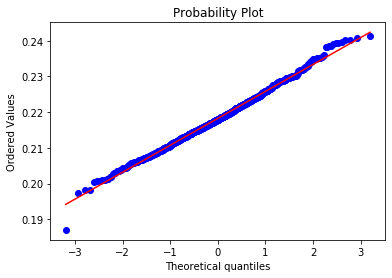

In [27]:
scipy.stats.probplot(boot_means, dist="norm", plot=pylab)
plt.show()

In [36]:
boot_ = [scipy.stats.kurtosis(np.random.choice(data,len(data))) for _ in range(1000)]

Text(0.5, 1.0, '1000 bootstrap samples')

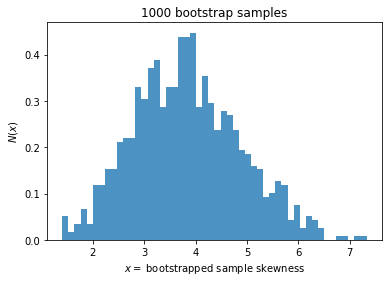

In [41]:
plt.hist(boot_,bins=50,density=True,alpha=0.8)
#plt.axvline(x = np.stats.skew(data),color='red',label='data mean')
#plt.axvline(x = np.mean(data)+np.std(boot_means),color='red',linestyle='--',label = 'mean $\pm$ boot_std')
#plt.axvline(x = np.mean(data)-np.std(boot_means),color='red',linestyle='--')
#plt.legend()
plt.xlabel('$x = $ bootstrapped sample skewness')
plt.ylabel('$N(x)$')
plt.title('1000 bootstrap samples')

#plt.savefig('Nerve_firing_boot.png', dpi=1000)

In [42]:
hist = np.histogram(boot_)
hist_dist = scipy.stats.rv_histogram(hist)

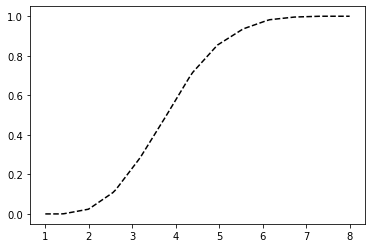

In [43]:
xs = np.linspace(1, 8, 100)

plt.plot(xs, hist_dist.cdf(xs), color='black', linestyle='--')